Display a list of operating systems along with the average amount of RAM

In [3]:
import pandas as pd 

computers =pd.read_csv("computers.csv")
task1 = computers.groupby(by="system")["ram_gb"].mean()
task1 = pd.DataFrame(data=task1)
task1.rename(columns={"ram_gb": "avwerage_ram_gb"},inplace=True)
task1

,avwerage_ram_gb
system,
Linux,32.000000
Windows,13.333333
macOS,19.200000


Create a bar chart showing the total size of shared files and the total size of unshared files

shared
no     2816060
yes    3041054
Name: filesize_kB, dtype: int64

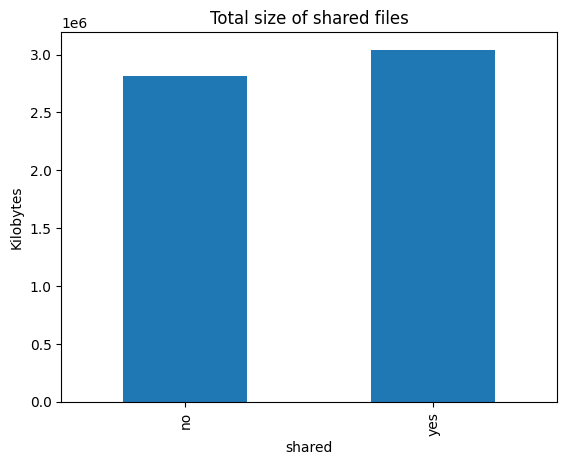

In [9]:
import matplotlib as plt
files = pd.read_csv("files.csv")
files
files.groupby(by="shared")["filesize_kB"].sum().plot(kind="bar", title="Total size of shared files", ylabel="Kilobytes")
files.groupby(by="shared")["filesize_kB"].sum()


View Mela Hallards shared files, sorted by file with the largest file size

In [13]:
computers.rename(columns={'id':"computer_id"}, inplace=True)
files.rename(columns={'id':'file_id'},inplace = True)
computers_files = pd.merge(computers,files,on="computer_id")
computers_files.query("user == 'Mela Hallard' and shared =='yes'").sort_values(by='filesize_kB',ascending=False)

,computer_id,user,system,ram_gb,ssd_gb,file_id,filename,filesize_kB,shared
228,7,Mela Hallard,Windows,16,512,384,VelPede.pdf,24983,yes
223,7,Mela Hallard,Windows,16,512,299,NasceturRidiculusMus.mov,20433,yes
210,7,Mela Hallard,Windows,16,512,84,Condimentum.txt,18993,yes
209,7,Mela Hallard,Windows,16,512,31,Augue.mp3,17226,yes
218,7,Mela Hallard,Windows,16,512,252,Orci.xls,13108,yes
221,7,Mela Hallard,Windows,16,512,281,NecNisiVulputate.tiff,6339,yes
229,7,Mela Hallard,Windows,16,512,399,TempusSit.xls,4619,yes
232,7,Mela Hallard,Windows,16,512,453,Etiam.xls,4146,yes
233,7,Mela Hallard,Windows,16,512,458,HabitassePlatea.avi,2897,yes
211,7,Mela Hallard,Windows,16,512,152,HendreritAt.png,2845,yes


View a list of computers with the number of files

In [24]:
task_4 = computers_files[['filename',"computer_id"]].groupby(by='computer_id').count()
task_4

,filename
computer_id,
1,35
2,40
3,36
4,30
5,35
6,32
7,29
8,33
9,35


Create a bar chart showing the total size on Windows and linux

<Axes: title={'center': 'total file size in kB on Windows and Linux'}, xlabel='Computer ID', ylabel='Size in kB'>

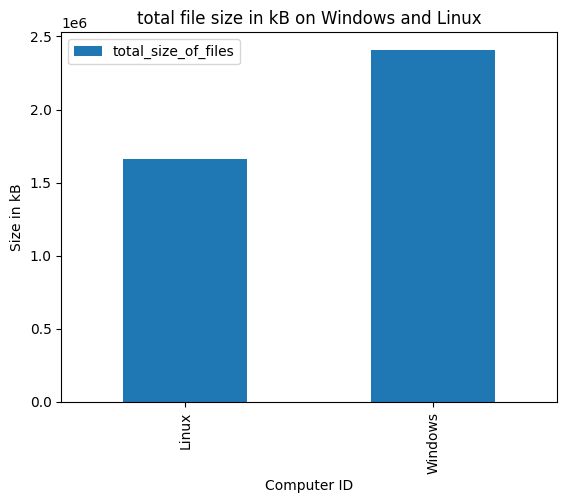

In [26]:
computers_files.query("system=='Windows' or system =='Linux'").groupby('system')['filesize_kB'].sum()
task5 = computers_files.query("system=='Windows' or system =='Linux'").groupby('system')['filesize_kB'].sum()
task5= pd.DataFrame(task5)
task5.rename(columns={'filesize_kB':"total_size_of_files"}).plot(kind="bar",title="total file size in kB on Windows and Linux", xlabel= "Computer ID", ylabel="Size in kB")